In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# constants
data_path = '/usr/people/iwahle/501b_2p/data'

In [3]:
# load data
cur_fly = 'f5_f_depth34'
fly_fns = np.load(os.path.join(data_path, 'raw', cur_fly, 'ops.npy'), allow_pickle=True).item()['filelist']

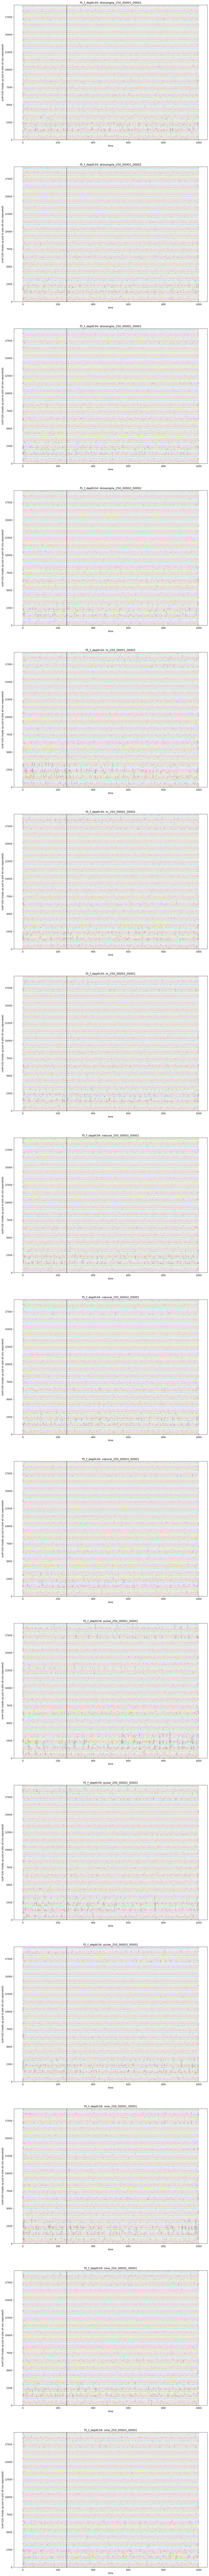

In [8]:
# plot data for each recording for fly2
fig,ax = plt.subplots(len(fly_fns),1,figsize=(15,200))
for ri,rec_dir in enumerate(fly_fns):
    # load data
    fly_fn = rec_dir.split('\\')[-1].split('.tif')[0]
    rec_spikes = np.load(os.path.join(data_path, 'processed', cur_fly, 'split_recs', 
        rec_dir.split('\\')[-1].split('.tif')[0] + '_suite2p_spikes.npy'))
        
    ax[ri].plot(rec_spikes.T + 100*np.arange(rec_spikes.shape[0]), alpha=0.4)
    ax[ri].set_ylim(0,100*rec_spikes.shape[0])
    ax[ri].set_xlabel('time')
    ax[ri].set_ylabel('roi#*100 (made up just to plot all rois separated)')
    ax[ri].set_title(f'{cur_fly}: {fly_fn}')
    ax[ri].axvline(250, color='black', linestyle='--')

In [5]:
# # run pca
# from sklearn.decomposition import PCA

# pca = PCA(n_components=3)
# pca_results = pca.fit_transform(spike_dict['f5_f_depth54'].T)

# # plot results in 3D
# fig,ax = plt.subplots()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(pca_results[:,0], pca_results[:,1], pca_results[:,2], 
#     c=np.arange(spike_dict['f5_f_depth54'].shape[1]))
# plt.show()

In [6]:
# # make conds raster
# raster = np.zeros(spike_dict['f5_f_depth54'].shape[1])
# rec_frames = 1000
# for i in range(len(conds_dict['f5_f_depth54'])):
#     cur_file = conds_dict['f5_f_depth54'][i]
#     if 'pulse' in cur_file:
#         c = np.ones(rec_frames)
#     elif 'sine' in cur_file:
#         c = np.ones(rec_frames)*2
#     elif 'm_' in cur_file:
#         c = np.ones(rec_frames)*3
#     elif 'natural' in cur_file:
#         c = np.ones(rec_frames)*4
#     elif 'drosongila' in cur_file:
#         c = np.ones(rec_frames)*5
#     else:
#         print(cur_file)
#         break

#     raster[i*1000:(i+1)*1000] = c


In [7]:
# # do dimensionality reduction
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

# cur_fly = 'f2_f'
# f2_fns = conds_dict[cur_fly]

# for ri,rec_dir in enumerate(f2_fns):
#     # load data
#     fly_fn = rec_dir.split('\\')[-1].split('.tif')[0]
#     rec_spikes = np.load(os.path.join(data_path, 'processed', cur_fly, 'split_recs', 
#         rec_dir.split('\\')[-1].split('.tif')[0] + '_suite2p_spikes.npy'))
        
#     tsne = TSNE(n_components=3)
#     components = tsne.fit_transform(rec_spikes.T)

#     # plot results in 3D
#     fig,ax = plt.subplots()
#     ax = fig.add_subplot(projection='3d')
#     ax.scatter(components[:,0], components[:,1], components[:,2],c=np.arange(components.shape[0]))
#     ax.set_title(f'{cur_fly}: {fly_fn}')
#     plt.savefig(f'tmp_{i}.png')
#     plt.show()